In [1]:
using Posets

import Distributions: MvNormal

using Plots

using LinearAlgebra

# Definciones: metodos y variables

In [2]:
dimension = 2
numeronodos= 4

4

In [3]:
mat = [1. .3; .3 1.]
matcesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

In [4]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end

metametodo (generic function with 1 method)

In [5]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)

#13 (generic function with 1 method)

# Datos

In [6]:
ejemplo = [generapuntuaciones_gaussian(20,7,2)[2] for _ in 1:10^3];

In [7]:
anima_corte0p98 = [metametodo(corte0p98, ej, true) for ej in ejemplo];
anima_corte0p95 = [metametodo(corte0p95, ej, true) for ej in ejemplo];

anima_corte0p90 = [metametodo(corte0p90, ej, true) for ej in ejemplo];

anima_corte0p80 = [metametodo(corte0p80, ej, true) for ej in ejemplo];

In [8]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true)[2] for _ in 1:10^3];

In [9]:
anima_corte0p98_ruido = [metametodo(corte0p98, ej, true) for ej in ejemplo_ruido];
anima_corte0p95_ruido = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido];
anima_corte0p90_ruido = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido];
anima_corte0p80_ruido = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido];

In [10]:
ejemplo_ruido_sesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,matruido=matcesgada)[2] for _ in 1:10^3];

In [11]:
anima_corte0p98_ruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p95_ruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p90_ruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p80_ruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido_sesgo];

In [12]:
ejemplo_miniruido_sesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,matnodos=matcesgada, matruido = nmat)[2] for _ in 1:10^3];

In [13]:
anima_corte0p98_miniruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p95_miniruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p90_miniruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p80_miniruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_miniruido_sesgo];

# Resultados

Se comparan los valores de __enegia local__ para distintos valores de $\alpha$ asi como
con distintos valores de __ruido__ tanto para los puntos-nodos como para la comparativa.

Conclusión: si se introduce sesgo no importa el ruido.

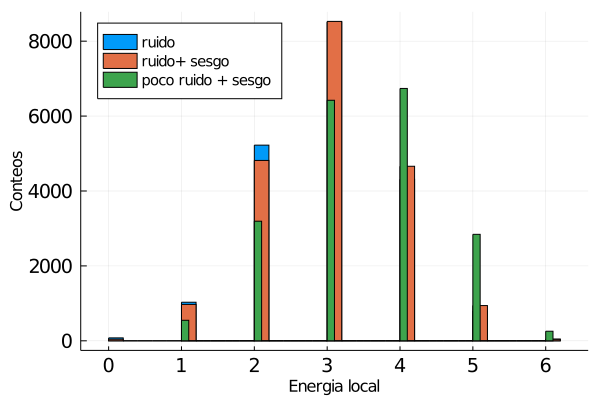

In [14]:
histogram([vcat(anima_corte0p80_ruido...), vcat(anima_corte0p80_ruido_sesgo...), vcat(anima_corte0p80_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
    labels = ["ruido" "ruido+ sesgo" "poco ruido + sesgo"],
legend = :topleft,legendfontsize=10)

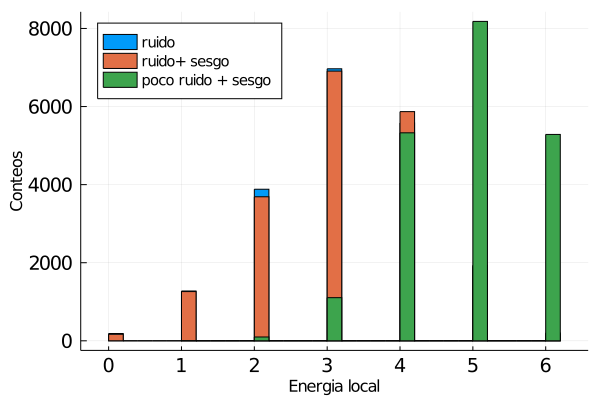

In [15]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95_ruido_sesgo...), vcat(anima_corte0p95_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

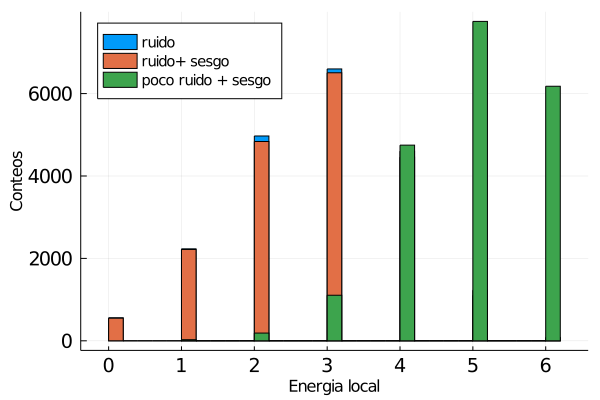

In [16]:
histogram([vcat(anima_corte0p98_ruido...), vcat(anima_corte0p98_ruido_sesgo...), vcat(anima_corte0p98_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

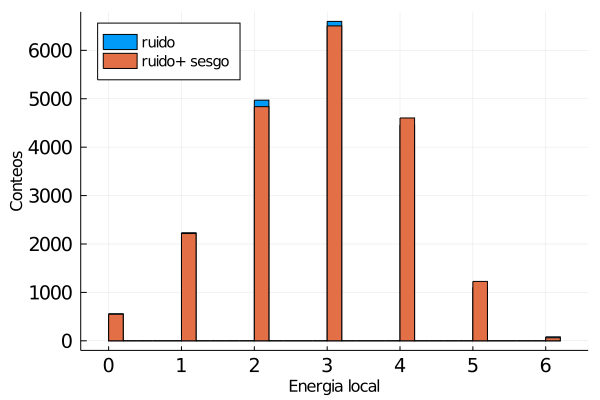

In [17]:
histogram([vcat(anima_corte0p98_ruido...), vcat(anima_corte0p98_ruido_sesgo...)],
xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "ruido+ sesgo"],legendfontsize=10
)

Practicamente no hay diferencia entre ruido grande y ruido chico.

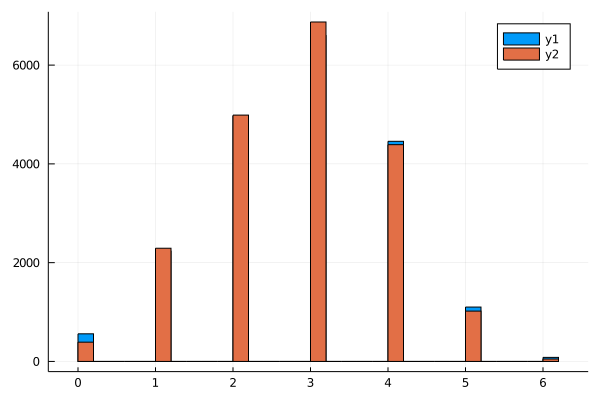

In [18]:
histogram([vcat(anima_corte0p98_ruido...), vcat(anima_corte0p98...)])

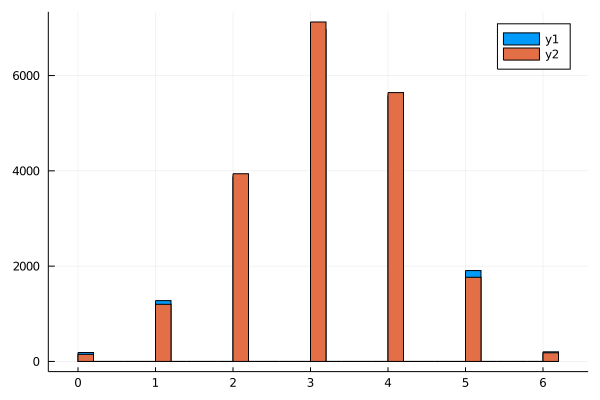

In [19]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95...)])

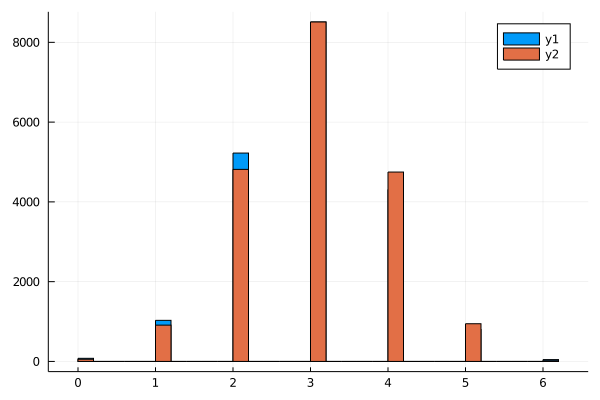

In [20]:
histogram([vcat(anima_corte0p80_ruido...), vcat(anima_corte0p80...)])

# Analisis de las distribuciones

In [27]:
mat = [1. .3; .3 1.]
matcesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

In [28]:
puntos_sesgo = rand(MvNormal([0 for _ in 1:2],matcesgada),10^3)

2×1000 Array{Float64,2}:
 0.906888  -2.66161  -0.0875337  0.237593  …  -0.269322  -0.971624  1.95111
 0.526076  -2.57884  -0.682571   0.112351      1.51973   -1.25528   0.852969

In [29]:
puntos_normal = rand(MvNormal([0 for _ in 1:2],mat),10^3)

2×1000 Array{Float64,2}:
  0.987427   0.173523   0.702751  …  -1.56301  -0.417873   0.176235
 -0.528515  -1.45807   -0.41704      -1.18119  -1.16569   -0.0901416

In [30]:
puntos_miniruido = rand(MvNormal([0 for _ in 1:2],nmat),10^3)

2×1000 Array{Float64,2}:
  0.0628656   0.227163   0.050293   …  0.00618198  0.0136212   0.0157583
 -0.0341676  -0.0128299  0.0902935     0.180085    0.102253   -0.0620589

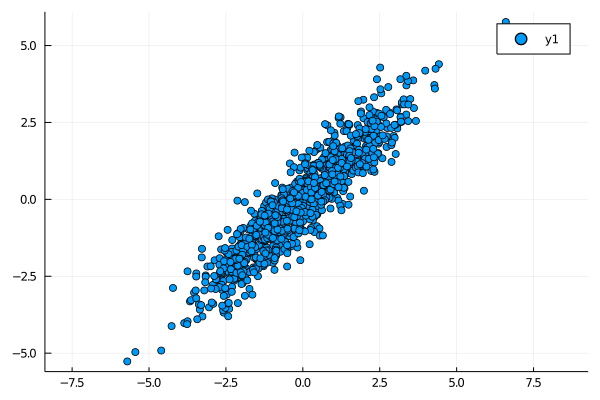

In [32]:
scatter( [(puntos_sesgo[:,i][1],puntos_sesgo[:,i][2]) for i in 1:10^3],ratio = :equal)

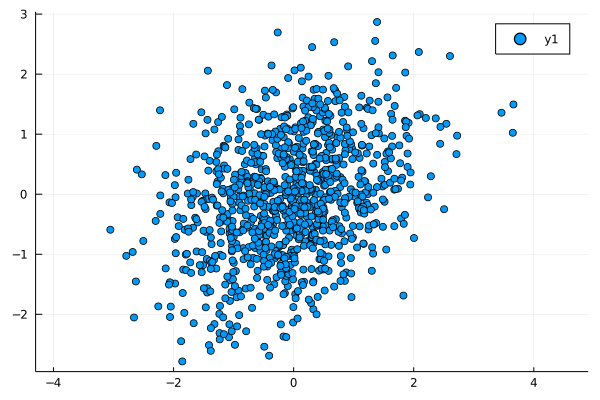

In [31]:
scatter( [(puntos_normal[:,i][1],puntos_normal[:,i][2]) for i in 1:10^3],ratio = :equal)